In [1]:
#-*- coding: utf-8 -*-
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
os.getcwd()

'C:\\Users\\ATIV5\\bakup\\Edward\\3\xc7\xd0\xb1\xe2.\xbf\xb5\xbb\xf3\xbd\xc5\xc8\xa3\xc3\xb3\xb8\xae'

In [5]:
#img = cv2.imread('lena_bw.bmp',1)

img1 = cv2.imread('lena-256x256.jpg', 1)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

cv2.imshow('image',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [2]:
windowsize_r = 8
windowsize_c = 8

img = cv2.imread('lena-256x256.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
for r in range(0,gray.shape[0] - windowsize_r, windowsize_r):
    for c in range(0,gray.shape[0] - windowsize_c, windowsize_c):
        window = gray[r:r+windowsize_r,c:c+windowsize_c]
#    hist = numpy.histogram(window,bins=256)
        cv2.imshow('wind',window)
        k = cv2.waitKey(0)
        if k == 32:
            cv2.destroyAllWindows()

In [43]:
N = 8
D = np.zeros((N, N))
for i in range(N):
    D[0,i] = 1/np.sqrt(8)
for i in xrange(1,N):
    for k in xrange(N):
        D[i,k] = 0.5*np.cos((np.pi/(2*N)) * i * (2*k + 1) )
D=D.T
print D

[[ 0.354  0.49   0.462  0.416  0.354  0.278  0.191  0.098]
 [ 0.354  0.416  0.191 -0.098 -0.354 -0.49  -0.462 -0.278]
 [ 0.354  0.278 -0.191 -0.49  -0.354  0.098  0.462  0.416]
 [ 0.354  0.098 -0.462 -0.278  0.354  0.416 -0.191 -0.49 ]
 [ 0.354 -0.098 -0.462  0.278  0.354 -0.416 -0.191  0.49 ]
 [ 0.354 -0.278 -0.191  0.49  -0.354 -0.098  0.462 -0.416]
 [ 0.354 -0.416  0.191  0.098 -0.354  0.49  -0.462  0.278]
 [ 0.354 -0.49   0.462 -0.416  0.354 -0.278  0.191 -0.098]]


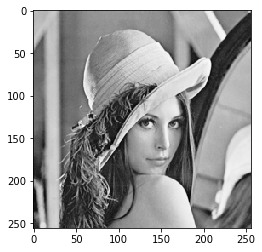

In [35]:
import matplotlib.image as mpimg
import matplotlib.cm as cm 
img = mpimg.imread('lena_bw.bmp')
#p=plt.imshow(img, origin='upper')
plt.imshow(img, cmap = cm.Greys_r)
plt.show()

In [25]:
img

array([[162, 162, 159, ..., 170, 171, 142],
       [162, 162, 159, ..., 172, 175, 146],
       [163, 160, 159, ..., 160, 151, 115],
       ..., 
       [ 51,  51,  52, ...,  82,  93,  92],
       [ 44,  48,  50, ...,  93, 101,  99],
       [ 44,  52,  49, ..., 100, 102, 107]], dtype=uint8)

In [86]:
def doDCT_triUL(grid_DCT):
    grid_DCT=grid_DCT[:,::-1]
    grid_DCT=np.triu(grid_DCT)
    grid_DCT=grid_DCT[:,::-1]
    return grid_DCT
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
#np.triu(np.rot90(a))
a=doDCT_triUL(a)
a

# a=a[:,::-1]
# a=np.triu(a)
# a=a[:,::-1]
# a

array([[1, 2, 3],
       [4, 5, 0],
       [7, 0, 0]])

[[ 927.57  -247.614  196.104  -60.985  108.737  -10.947   59.512   30.31 ]
 [-236.953   65.285  -53.794   16.491  -24.335    7.863  -15.329    0.   ]
 [ 200.887  -55.382   45.079  -15.034   25.587   -2.111    0.       0.   ]
 [ -69.304   16.404  -11.312    4.16    -8.372    0.       0.       0.   ]
 [ 107.791  -31.105   21.172   -7.429    0.       0.       0.       0.   ]
 [ -10.589    3.345   -4.178    0.       0.       0.       0.       0.   ]
 [  61.72   -14.69     0.       0.       0.       0.       0.       0.   ]
 [  28.799    0.       0.       0.       0.       0.       0.       0.   ]]


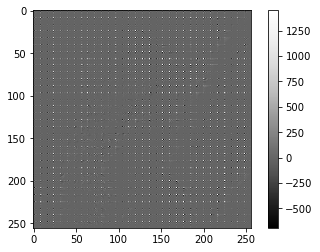

In [112]:
import scipy.misc
windowsize_r = 8
windowsize_c = 8

window = np.zeros((256, 256))
window = np.zeros((256, 256), dtype=np.float)

grid = np.zeros((8,8))
grid_DCT = np.zeros((8,8))

# make gradient window[:] = np.arange(255)

def doDCT(grid):
    return np.dot(np.dot(D, grid), D.T)

# Upper-Left DCT 성분을 얻기 위해 행렬 flipping을 함. [:,::-1]로 열에 대해 reverse copy함. rotation을 
# 할 경우 잘 나오지 않음. 따라서 fliiping 을 한번 해서 triu 파트를 얻고, 다시한번 flipping 을 하면 원래
# 얻고자한 UL 파트가 나옴.
def doDCT_triUL(grid_DCT):
    grid_DCT=grid_DCT[:,::-1]
    grid_DCT=np.triu(grid_DCT)
    grid_DCT=grid_DCT[:,::-1]
    return grid_DCT

img = cv2.imread('lena-256x256.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
for r in range(0,gray.shape[0], windowsize_r):
    for c in range(0,gray.shape[0], windowsize_c):
        grid = gray[r:r+windowsize_r,c:c+windowsize_c]
        grid_DCT = doDCT(grid)        
        window[r:r+windowsize_r,c:c+windowsize_c] = doDCT_triUL(grid_DCT)
        if r == 0 and c == 0:
#             print doDCT(grid)
            print(window[r:r+windowsize_r,c:c+windowsize_c])
        
# scipy.misc.imsave('outfile_dct.bmp', window)
# plt.imsave('outfile_dct.png', window, format='png')
plt.imsave('outfile_dct.png', window[:,:], cmap=plt.cm.gray)
plt.imshow(window, cmap = cm.Greys_r)
plt.colorbar()

plt.show()

In [125]:
def iDCT(grid):
    return np.dot(np.dot(D.T, grid), D)

# def undoDCT(grid):
#     Di=np.linalg.inv(D)
#     return np.dot(np.dot(Di, grid), Di.T)


# img = mpimg.imread('outfile_dct.bmp')
img = cv2.imread('outfile_dct.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(256, 256)

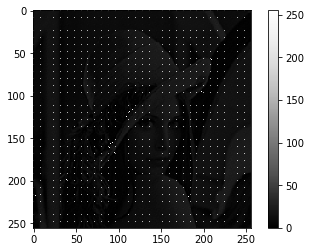

In [128]:
# window = np.zeros((256, 256))
window = np.zeros((256, 256), dtype=np.uint8)

for r in range(0,gray.shape[0], windowsize_r):
    for c in range(0,gray.shape[0], windowsize_c):
        grid = gray[r:r+windowsize_r,c:c+windowsize_c]
        window[r:r+windowsize_r,c:c+windowsize_c] = iDCT(grid)        

# scipy.misc.imsave('outfile.bmp', window)
# plt.imshow(window, cmap = cm.Greys_r)

plt.imsave('outfile.png', window[:,:], cmap=plt.cm.gray)
plt.imshow(window, cmap = cm.Greys_r)
plt.colorbar()

plt.show()

In [205]:
import scipy.misc
windowsize_r = 8
windowsize_c = 8

window = np.zeros((256, 256))
window = np.zeros((256, 256), dtype=np.float)

g_element = np.zeros((8,1))
g_stacked = np.zeros((64,1), dtype=np.uint8)
g_stacked_T = np.zeros((1,64))
gg_product = np.zeros((64,64))

grid = np.zeros((8,8))

def KLT(a):
    val,vec = np.linalg.eig(np.cov(a))
    klt = np.dot(vec,a)
    return klt,vec,val

img = cv2.imread('lena-256x256.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

for r in range(0,gray.shape[0], windowsize_r):
    for c in range(0,gray.shape[0], windowsize_c):
        grid = gray[r:r+windowsize_r,c:c+windowsize_c]

        if r == 0 and c == 0:     
            g_stacked = grid.flatten() 
            print(g_stacked.shape) 
            print(np.cov(g_stacked))
            
            z = np.vstack((g_stacked, g_stacked.T))
            c = np.cov(z.T)

#             print(g_stacked * g_stacked.T).shape
#             kk,m,val = KLT(np.dot(g_stacked, g_stacked.T))
#             print(g_stacked)
#             print kk
#             print m
#             print np.dot(kk.T,m).T
#             print val
        
# plt.imsave('outfile_dct.png', window[:,:], cmap=plt.cm.gray)
# plt.imshow(window, cmap = cm.Greys_r)
# plt.colorbar()

# plt.show()

(64,)
9.1902281746
[[137 135 133 136 138 133 135 132 137 137 133 136 137 135 134 132 138 133
  134 135 136 131 130 130 133 133 132 130 134 133 128 125 129 132 131 130
  134 131 132 128 131 134 130 122 132 130 130 130 131 130 130 130 132 132
  127 130 131 132 130 130 131 131 131 128]
 [137 135 133 136 138 133 135 132 137 137 133 136 137 135 134 132 138 133
  134 135 136 131 130 130 133 133 132 130 134 133 128 125 129 132 131 130
  134 131 132 128 131 134 130 122 132 130 130 130 131 130 130 130 132 132
  127 130 131 132 130 130 131 131 131 128]]


In [139]:
import numpy as np

num = 10
x = np.random.random(num) # Observation locations
x

array([ 0.017,  0.196,  0.125,  0.566,  0.691,  0.075,  0.904,  0.355,
        0.471,  0.094])

In [179]:
# "Green's functions" for a second-order polynomial
# at our observed locations
A = np.hstack([x**i for i in range(3)])
A.shape

(30,)

In [224]:
# cov = np.zeros((64, 64), dtype=np.uint32)
# for i, j in np.ndindex(cov.shape):
#     cov[i,j] = g_stacked[i]*g_stacked.T[j] - g_stacked[i]
# cov

print(g_stacked)
print(g_stacked.T)

[137 135 133 136 138 133 135 132 137 137 133 136 137 135 134 132 138 133
 134 135 136 131 130 130 133 133 132 130 134 133 128 125 129 132 131 130
 134 131 132 128 131 134 130 122 132 130 130 130 131 130 130 130 132 132
 127 130 131 132 130 130 131 131 131 128]
[137 135 133 136 138 133 135 132 137 137 133 136 137 135 134 132 138 133
 134 135 136 131 130 130 133 133 132 130 134 133 128 125 129 132 131 130
 134 131 132 128 131 134 130 122 132 130 130 130 131 130 130 130 132 132
 127 130 131 132 130 130 131 131 131 128]
